In [119]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import csv


file_name = 'Climate.xlsx'
Climate = pd.read_excel(file_name)

In [120]:
# file_name = 'Climate_year_DF.xlsx'
# file_name ='GlobalLandTemperatures.csv'
storm = 'pacific.csv'
Climate = pd.read_excel(file_name)
Cyclone = pd.read_csv(storm)
Cyclone['Date']	=	pd.to_datetime(Cyclone['Date'],	format='%Y%m%d')
Cyclone = Cyclone[(Cyclone['Date'].dt.year>=1980) & (Cyclone['Date'].dt.year<=2010)]
Cyclone.drop(['Low Wind NE','Low Wind SE','Low Wind SW','Low Wind NW','Moderate Wind NE','Moderate Wind SE','Moderate Wind SW','Moderate Wind NW','High Wind NE','High Wind SE','High Wind SW','High Wind NW'], axis=1, inplace=True)
Cyclone['Name']= Cyclone['Name'].str.rstrip().str.lstrip()
Created_Cyclone = []
for y in range(1980,2011):
    Created_Cyclone.append(len(Cyclone[Cyclone['Date'].dt.year == y]['ID'].unique()))
Created_Cyclone
CC = {}
idx = 0
for i in range(1980,2011):
    CC[f'{i}'] = Created_Cyclone[idx]
    idx+=1
CC = list(CC.keys())

In [121]:
Climate

,dt,AverageTemperature,Country
0,1980-01-01,0.533,Afghanistan
1,1980-02-01,2.050,Afghanistan
2,1980-03-01,8.180,Afghanistan
3,1980-04-01,17.357,Afghanistan
4,1980-05-01,21.573,Afghanistan
...,...,...,...
90391,2010-08-01,16.512,횇land
90392,2010-09-01,12.001,횇land
90393,2010-10-01,6.698,횇land
90394,2010-11-01,0.790,횇land


In [122]:
# Climate['dt'].dt.year

In [123]:
# Climate['dt'].info()

In [124]:
# temp = Climate[Climate['dt'].dt.year==1980]
# temp = temp[temp['Country']=='Zimbabwe']

idx = 1
ClimateDF = pd.DataFrame(columns=['dt', 'AverageTemperature', 'Country'])
Country = list(set(Climate['Country'].values))
Country = sorted(Country)
ClimateDF

,dt,AverageTemperature,Country


In [125]:

for Con in Country:
    temp = Climate[Climate['Country']==Con]
    # print(temp)
    # for y in range(1980,2011,1):
    #     print(temp['dt'].dt.year == y)
        # print(temp['dt'].dt.year)
        # temp = temp[temp['dt'].dt.year == y]
        # print(temp[temp['dt'].dt.year == y])
        # print(temp)
        # print(temp.info())
        # avg_temp = round(temp['AverageTemperature'].mean(), 2)
        # print(avg_temp)
        # ClimateDF.loc[f'{idx}'] = [year, avg_temp, Con]
    year = 1980
    while year <= 2010:
        # print(year, type(year))
        # print(temp[temp['dt'].dt.year == year])
        new_temp = temp[temp['dt'].dt.year == year]
        # print(new_temp)
        # temp = temp[temp['dt'].dt.year == year]
        # print(temp)
        avg_temp = round(new_temp['AverageTemperature'].mean(), 2)
        ClimateDF.loc[f'{idx}'] = [year, avg_temp, Con]
        year += 1
        idx += 1
ClimateDF

,dt,AverageTemperature,Country
1,1980,14.89,Afghanistan
2,1981,14.86,Afghanistan
3,1982,13.73,Afghanistan
4,1983,14.61,Afghanistan
5,1984,14.25,Afghanistan
...,...,...,...
7529,2006,7.10,횇land
7530,2007,7.03,횇land
7531,2008,7.49,횇land
7532,2009,6.49,횇land


In [126]:
GoodBye_land = ClimateDF[ClimateDF['Country']=='횇land']
# GoodBye_land    # 7503:7533
ClimateDF.drop(ClimateDF.index[7502:], inplace=True)
ClimateDF
# re
# ClimateDF

,dt,AverageTemperature,Country
1,1980,14.89,Afghanistan
2,1981,14.86,Afghanistan
3,1982,13.73,Afghanistan
4,1983,14.61,Afghanistan
5,1984,14.25,Afghanistan
...,...,...,...
7498,2006,21.62,Zimbabwe
7499,2007,21.60,Zimbabwe
7500,2008,21.55,Zimbabwe
7501,2009,21.38,Zimbabwe


In [127]:
Created_Cyclone

[14,
 15,
 23,
 21,
 21,
 23,
 17,
 20,
 22,
 24,
 25,
 16,
 30,
 18,
 22,
 11,
 13,
 24,
 16,
 14,
 21,
 19,
 19,
 17,
 17,
 17,
 25,
 15,
 19,
 23,
 13]

In [128]:
list(ClimateDF[ClimateDF['Country']=='Zimbabwe']['AverageTemperature'])

[21.13,
 20.8,
 21.57,
 22.37,
 21.71,
 21.2,
 21.2,
 22.32,
 21.48,
 21.43,
 22.13,
 21.79,
 22.84,
 21.85,
 21.61,
 22.5,
 21.55,
 21.57,
 22.14,
 21.49,
 21.15,
 21.69,
 22.08,
 21.89,
 21.33,
 22.51,
 21.62,
 21.6,
 21.55,
 21.38,
 21.99]

In [129]:
# ClimateDF[ClimateDF['dt']==1980].count()['dt']

float(ClimateDF.iloc[0]['AverageTemperature'])

14.89

In [130]:
# 혹시 1980~2010 빈 값있나 확인
for i in range(1980,2011):
    a = ClimateDF[ClimateDF['dt']==i].count()
    a = a['dt']
    if a < 242 or a > 242:
        print(i)

In [131]:
year_list = [i for i in range(1980, 2011)]
Climate_year_DF = pd.DataFrame(columns=[year_list])

# Climate_year_DF.loc['India'] = list(ClimateDF[ClimateDF['Country']=='India']['AverageTemperature'])
Climate_year_DF

# year_list

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010


In [132]:
# for i in range(7502)
#     year = ClimateDF['Country'][i]

Country = list(set(ClimateDF['Country'].values))
for con in Country:
    Climate_year_DF.loc[con] = list(ClimateDF[ClimateDF['Country']==con]['AverageTemperature'])
        
        # Climate['AverageTemperature']
        # float(ClimateDF.iloc[y]['AverageTemperature'])
Climate_year_DF   # 나라 : 1980~2010 식으로 더하기.

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Comoros,25.93,25.94,26.25,26.17,25.58,25.76,26.01,26.36,26.33,25.78,...,26.41,26.66,26.60,26.39,26.68,26.47,26.60,26.19,26.59,26.79
Niger,27.81,27.55,27.59,27.54,27.93,27.66,27.92,28.23,27.79,27.17,...,28.12,28.15,28.30,28.37,28.64,28.29,28.41,27.90,28.85,29.30
Saint Kitts And Nevis,26.55,26.49,26.07,26.49,26.04,26.04,26.12,26.67,26.35,26.09,...,26.67,26.78,26.92,26.53,26.99,26.87,26.96,26.39,26.72,27.16
Mali,29.14,28.91,28.44,29.28,28.86,28.79,28.52,29.64,28.78,28.77,...,29.31,29.43,29.43,29.43,29.53,29.04,29.20,28.95,29.44,30.13
Slovenia,9.05,9.85,10.29,10.34,9.48,9.46,9.68,9.73,10.42,10.53,...,10.89,11.34,11.01,10.24,9.80,10.72,11.46,11.25,11.24,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Saint Pierre And Miquelon,4.36,6.04,4.08,5.61,5.07,3.79,4.12,4.83,5.03,4.41,...,5.68,4.65,5.20,5.31,5.75,6.54,4.99,5.56,5.48,6.57
Colombia,25.43,25.14,25.19,25.63,24.88,25.01,25.01,25.63,25.21,24.86,...,25.41,25.57,25.66,25.55,25.67,25.48,25.49,25.15,25.62,25.69
Guinea Bissau,27.31,27.21,26.96,27.70,27.14,27.14,27.01,27.55,27.28,27.03,...,27.66,27.80,27.46,27.63,27.96,27.35,27.52,27.58,27.31,27.92
Albania,12.16,12.58,13.02,12.51,12.64,12.95,13.06,13.00,13.04,12.80,...,13.69,13.56,13.63,13.26,12.75,12.98,13.89,13.96,13.84,13.78


In [133]:
Climate_year_DF.loc['South Korea']

1980    11.26
1981    11.47
1982    12.47
1983    12.36
1984    11.80
1985    12.18
1986    11.60
1987    12.36
1988    12.23
1989    12.95
1990    13.23
1991    12.41
1992    12.60
1993    11.97
1994    13.48
1995    12.33
1996    12.16
1997    12.82
1998    13.65
1999    13.03
2000    12.58
2001    12.84
2002    12.82
2003    12.65
2004    13.37
2005    12.36
2006    12.90
2007    13.29
2008    13.03
2009    12.95
2010    12.64
Name: South Korea, dtype: float64

In [134]:
raise_temp_avg = []
for i in range(1980,2011):
    temp = round(float(Climate_year_DF[i].mean().values),3)
    raise_temp_avg.append(temp)
raise_temp_avg

C:\Users\kjy19\AppData\Local\Temp\ipykernel_19204\4206222056.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  temp = round(float(Climate_year_DF[i].mean().values),3)


[18.94,
 19.003,
 18.936,
 19.176,
 18.847,
 18.792,
 18.888,
 19.143,
 19.194,
 19.135,
 19.395,
 19.092,
 19.052,
 19.014,
 19.335,
 19.349,
 19.044,
 19.331,
 19.68,
 19.472,
 19.427,
 19.506,
 19.646,
 19.607,
 19.503,
 19.579,
 19.617,
 19.689,
 19.501,
 19.627,
 19.718]

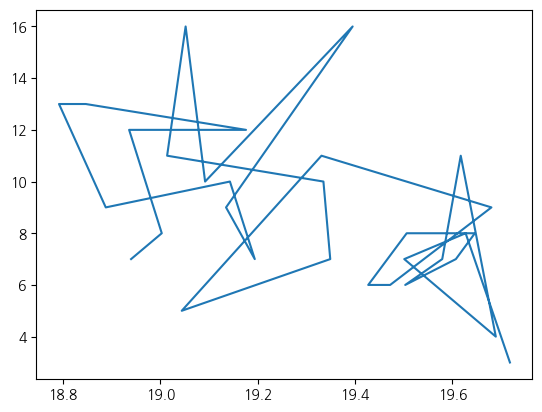

In [160]:
raise_temp_avg
plz = [7,8,12,12,13,13,9,10,7,9,16,10,16,11,10,7,5,11,9,6,6,8,8,7,6,7,11,4,7,8,3]

plt.plot(raise_temp_avg,plz)

In [163]:
# pd.corr(raise_temp_avg,plz)

AttributeError: module 'pandas' has no attribute 'corr'

In [171]:
a = pd.DataFrame({'평균기온' : raise_temp_avg,
              'HU 빈도' : plz})
a.corr()['HU 빈도']

평균기온    -0.476507
HU 빈도    1.000000
Name: HU 빈도, dtype: float64

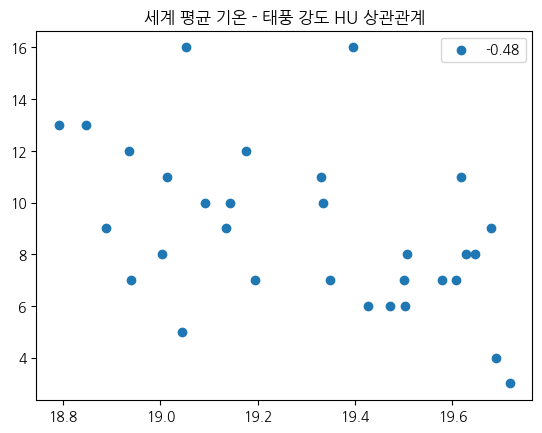

In [173]:
plt.scatter(raise_temp_avg,plz)
plt.title('세계 평균 기온 - 태풍 강도 HU 상관관계')
plt.legend(round(a.corr()['HU 빈도'],2))

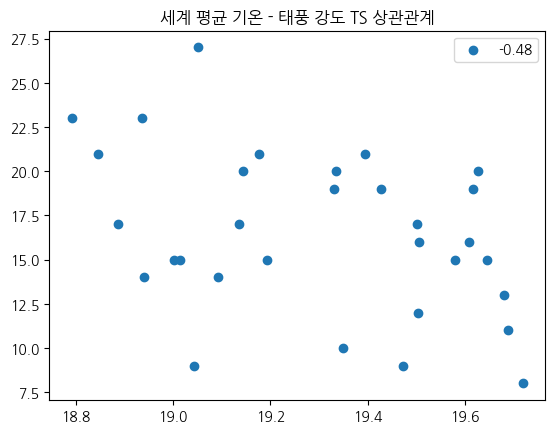

In [176]:
a = pd.DataFrame({'평균기온' : raise_temp_avg,
              'TS 빈도' : plz})
a.corr()['TS 빈도']
plz2 = [14,15,23,21,21,23,17,20,15,17,21,14,27,15,20,10,9,19,13,9,19,16,15,16,12,15,19,11,17,20,8,]
plt.scatter(raise_temp_avg,plz2)
plt.title('세계 평균 기온 - 태풍 강도 TS 상관관계')
plt.legend(round(a.corr()['TS 빈도'],2))

Text(0.5, 1.0, '년간 태풍 발생 - 세계 평균 기온 연관')

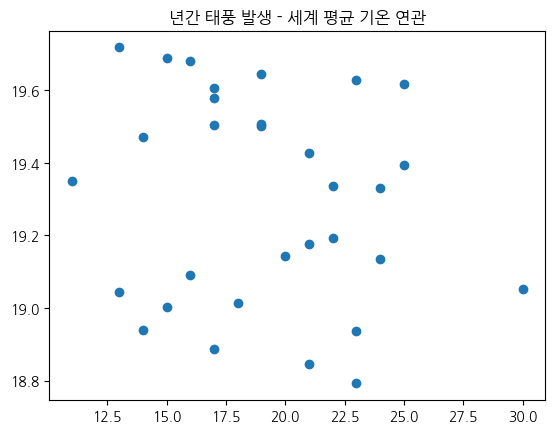

In [136]:
# plt.plot(CC,raise_temp_avg)
# Created_Cyclone -> 년도별 총 태풍 발생 수
# raise_temp_avg -> 년도별 기온 변화
plt.scatter(Created_Cyclone, raise_temp_avg)
plt.title('년간 태풍 발생 - 세계 평균 기온 연관')

In [137]:
newDF = pd.DataFrame([raise_temp_avg,Created_Cyclone], columns=CC, index=['avg_temp','Cyclone'])
newDF = newDF.T
# newDF

In [138]:
newDF.corr()

,avg_temp,Cyclone
avg_temp,1.000000,-0.163197
Cyclone,-0.163197,1.000000


In [139]:
Climate_year_DF.loc['Afghanistan']

1980    14.89
1981    14.86
1982    13.73
1983    14.61
1984    14.25
1985    14.89
1986    14.22
1987    14.98
1988    15.39
1989    14.13
1990    14.99
1991    14.37
1992    14.06
1993    14.44
1994    14.75
1995    14.86
1996    14.43
1997    14.90
1998    15.13
1999    15.39
2000    15.50
2001    15.78
2002    15.54
2003    14.92
2004    15.77
2005    14.98
2006    15.60
2007    15.11
2008    15.22
2009    15.26
2010    15.83
Name: Afghanistan, dtype: float64

In [140]:
# Lara = 
Climate_year_DF.loc['Afghanistan'].index.tolist()
Climate_year_DF.loc['Afghanistan'].values.tolist()
# Climate_year_DF.loc['Afghanistan'].
# Lara.replace(',','')
# Climate_year_DF.loc['Afghanistan'].values
# Lara[0]


[14.89,
 14.86,
 13.73,
 14.61,
 14.25,
 14.89,
 14.22,
 14.98,
 15.39,
 14.13,
 14.99,
 14.37,
 14.06,
 14.44,
 14.75,
 14.86,
 14.43,
 14.9,
 15.13,
 15.39,
 15.5,
 15.78,
 15.54,
 14.92,
 15.77,
 14.98,
 15.6,
 15.11,
 15.22,
 15.26,
 15.83]

Text(0.5, 1.0, '242개국 1980~2010 년간 평균 기온 변화')

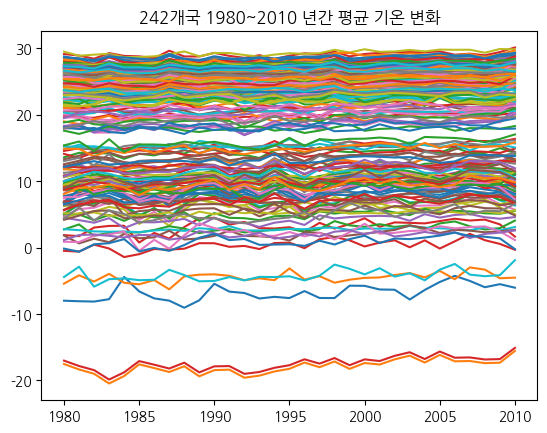

In [141]:

for con in Country:
    plt.plot(Climate_year_DF.loc[con].index.tolist(),Climate_year_DF.loc[con].values.tolist())
    # Climate_year_DF.loc[con]

plt.title('242개국 1980~2010 년간 평균 기온 변화')

In [142]:
# Climate_year_DF.loc['Africa'].max()
float(round(Climate_year_DF.loc['Africa'][2010] - Climate_year_DF.loc['Africa'][1980], 2))


1.02

In [143]:
high_temp_DF = pd.DataFrame(columns=['min','max','raise', 'max-min'])
idx = 0
for con in Country:
    high_temp_DF.loc[con] = [Climate_year_DF.loc[con].min(), Climate_year_DF.loc[con].max(),
    float(round(Climate_year_DF.loc[con][2010] - Climate_year_DF.loc[con][1980], 2)),
    Climate_year_DF.loc[con].max()-Climate_year_DF.loc[con].min()]
    idx += 1

In [144]:
high_temp_DF['raise'].mean()

np.float64(0.7771900826446281)

In [145]:
# high_temp_DF['max-min'].max() => 4.8

In [146]:
high_temp = high_temp_DF.sort_values(by='raise')


In [147]:
high_temp = high_temp['raise']

In [148]:
high_temp

Australia                 -0.51
Isle Of Man               -0.43
Oceania                   -0.40
United Kingdom (Europe)   -0.32
Ireland                   -0.29
                           ... 
Jordan                     2.38
Lebanon                    2.39
Syria                      2.43
Canada                     2.53
Ukraine                    2.55
Name: raise, Length: 242, dtype: float64

In [149]:
row_raise = high_temp.head()
row_raise_coun = row_raise.index.tolist()
row_raise

Australia                 -0.51
Isle Of Man               -0.43
Oceania                   -0.40
United Kingdom (Europe)   -0.32
Ireland                   -0.29
Name: raise, dtype: float64

In [150]:
high_raise = high_temp.tail()
high_raise_coun = high_raise.index.tolist()
high_raise

Jordan     2.38
Lebanon    2.39
Syria      2.43
Canada     2.53
Ukraine    2.55
Name: raise, dtype: float64

In [151]:
high_temp.loc['Australia']

np.float64(-0.51)

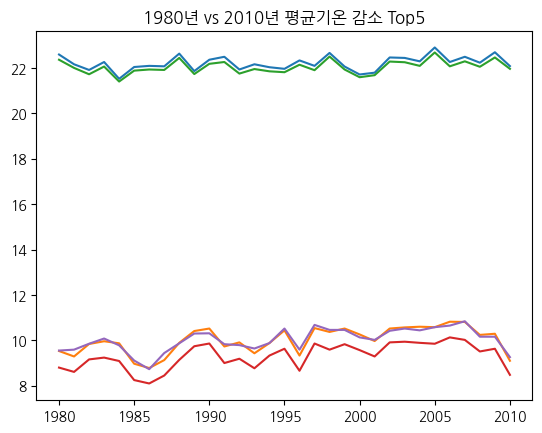

In [152]:
for up in row_raise_coun:
    plt.plot(year_list,Climate_year_DF.loc[up])
plt.title('1980년 vs 2010년 평균기온 감소 Top5')
plt.show()

# up_25_DF

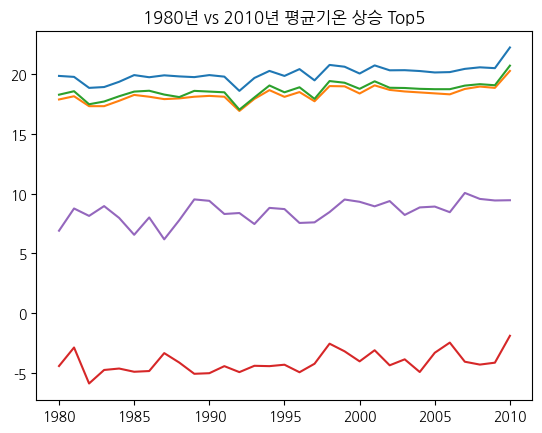

In [153]:
for up in high_raise_coun:
    plt.plot(year_list,Climate_year_DF.loc[up])
plt.title('1980년 vs 2010년 평균기온 상승 Top5')
plt.show()

In [154]:
high_temp_DF[high_temp_DF['raise']==high_temp_DF['raise'].max()]

,min,max,raise,max-min
Ukraine,6.18,10.06,2.55,3.88


In [155]:
# 태풍 피해가 가장 잦은 나라, 필리핀
ClimateDF[ClimateDF['Country'] == 'Philippines']

,dt,AverageTemperature,Country
5364,1980,26.77,Philippines
5365,1981,26.83,Philippines
5366,1982,26.75,Philippines
5367,1983,27.10,Philippines
5368,1984,26.67,Philippines
5369,1985,26.90,Philippines
5370,1986,26.79,Philippines
5371,1987,27.30,Philippines
5372,1988,27.19,Philippines
5373,1989,26.73,Philippines


In [156]:
# ClimateDF['Cou']

In [157]:
a = list(ClimateDF[(ClimateDF['dt']==1980) & (ClimateDF['AverageTemperature']>=26.5)]['Country'].unique())
len(a)

64

In [158]:
ClimateDF[ClimateDF['AverageTemperature']>=25]

# ['1980']

,dt,AverageTemperature,Country
50,1998,25.02,Africa
55,2003,25.03,Africa
57,2005,25.16,Africa
61,2009,25.03,Africa
62,2010,25.47,Africa
...,...,...,...
7436,2006,27.18,Yemen
7437,2007,27.31,Yemen
7438,2008,26.81,Yemen
7439,2009,27.34,Yemen


In [159]:
up_25 = list(ClimateDF[ClimateDF['AverageTemperature'].min>=25]['Country'].unique())
up_25 

TypeError: '>=' not supported between instances of 'method' and 'int'

In [ ]:
Climate_year_DF.loc['Yemen']

1980    26.86
1981    26.54
1982    26.08
1983    26.24
1984    25.85
1985    25.88
1986    26.05
1987    26.61
1988    26.78
1989    25.89
1990    26.64
1991    26.59
1992    26.27
1993    26.40
1994    26.99
1995    26.58
1996    26.55
1997    26.94
1998    27.37
1999    27.35
2000    27.44
2001    27.07
2002    27.13
2003    27.36
2004    27.33
2005    27.29
2006    27.18
2007    27.31
2008    26.81
2009    27.34
2010    27.30
Name: Yemen, dtype: float64

In [ ]:
up_25_DF = pd.DataFrame() #columns=year_list

for up in a:
    up_25_DF[up] = Climate_year_DF.loc[up]

up_25_DF = up_25_DF.T
up_25_DF

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
American Samoa,26.99,26.75,26.90,26.93,26.88,26.95,26.98,26.90,27.09,26.75,...,27.23,27.54,27.26,27.28,27.37,27.08,27.45,27.00,27.03,27.45
Anguilla,27.25,27.18,26.83,27.26,26.86,26.84,26.88,27.38,27.14,26.85,...,27.41,27.54,27.68,27.33,27.73,27.64,27.69,27.14,27.47,27.86
Antigua And Barbuda,27.12,27.06,26.68,27.08,26.62,26.62,26.71,27.22,26.95,26.69,...,27.25,27.36,27.51,27.15,27.60,27.47,27.51,26.97,27.28,27.74
Aruba,28.63,28.45,28.25,28.69,28.20,27.89,27.99,28.86,28.35,28.13,...,28.63,28.85,28.85,28.51,28.77,28.80,28.82,28.45,28.83,28.97
Bahrain,26.56,26.58,25.52,25.59,25.96,26.20,26.33,26.64,26.63,26.02,...,27.43,27.27,27.37,27.15,26.98,27.22,27.22,27.03,27.31,28.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trinidad And Tobago,26.68,26.79,26.47,26.81,26.26,26.09,26.26,27.05,26.73,26.33,...,26.95,26.85,27.13,26.80,27.20,27.07,26.90,26.83,27.04,27.55
Turks And Caicas Islands,27.42,26.99,27.37,27.32,26.88,26.99,27.11,27.34,26.99,26.96,...,27.25,27.70,27.82,27.53,27.50,27.45,27.60,27.43,27.44,27.30
United Arab Emirates,28.30,28.13,27.33,27.37,27.40,27.72,27.87,28.09,28.14,27.59,...,29.01,29.06,29.23,29.10,28.99,28.98,29.16,28.68,29.13,29.67
Virgin Islands,26.99,26.90,26.55,26.96,26.60,26.59,26.61,27.14,26.83,26.56,...,27.13,27.30,27.38,27.03,27.42,27.37,27.47,26.92,27.24,27.59


In [ ]:
up_25_DF[1980]

,1980
American Samoa,26.99
Anguilla,27.25
Antigua And Barbuda,27.12
Aruba,28.63
Bahrain,26.56
...,...
Trinidad And Tobago,26.68
Turks And Caicas Islands,27.42
United Arab Emirates,28.30
Virgin Islands,26.99


In [ ]:
(up_25_DF[1980]-up_25_DF[2010])

,1980,2010
American Samoa,NaN,NaN
Anguilla,NaN,NaN
Antigua And Barbuda,NaN,NaN
Aruba,NaN,NaN
Bahrain,NaN,NaN
...,...,...
Trinidad And Tobago,NaN,NaN
Turks And Caicas Islands,NaN,NaN
United Arab Emirates,NaN,NaN
Virgin Islands,NaN,NaN


In [ ]:
up_25DF = pd.DataFrame() #columns=year_list

for up in up_25:
    up_25DF[up] = Climate_year_DF.loc[up]

C:\Users\kjy19\AppData\Local\Temp\ipykernel_20712\1753956740.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  up_25DF[up] = Climate_year_DF.loc[up]
C:\Users\kjy19\AppData\Local\Temp\ipykernel_20712\1753956740.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  up_25DF[up] = Climate_year_DF.loc[up]
C:\Users\kjy19\AppData\Local\Temp\ipykernel_20712\1753956740.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [ ]:
up_25DF = up_25DF.T

In [ ]:
up_25DF

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Africa,24.45,24.30,24.21,24.58,24.39,24.34,24.31,24.92,24.57,24.22,...,24.84,24.96,25.03,24.90,25.16,24.82,24.85,24.75,25.03,25.47
Algeria,23.16,23.58,23.09,23.68,23.06,23.53,23.26,24.25,23.82,23.72,...,24.72,24.26,24.39,23.92,24.22,24.20,24.07,23.95,24.15,25.22
American Samoa,26.99,26.75,26.90,26.93,26.88,26.95,26.98,26.90,27.09,26.75,...,27.23,27.54,27.26,27.28,27.37,27.08,27.45,27.00,27.03,27.45
Anguilla,27.25,27.18,26.83,27.26,26.86,26.84,26.88,27.38,27.14,26.85,...,27.41,27.54,27.68,27.33,27.73,27.64,27.69,27.14,27.47,27.86
Antarctica,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05,...,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05,26.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turks And Caicas Islands,27.42,26.99,27.37,27.32,26.88,26.99,27.11,27.34,26.99,26.96,...,27.25,27.70,27.82,27.53,27.50,27.45,27.60,27.43,27.44,27.30
United Arab Emirates,28.30,28.13,27.33,27.37,27.40,27.72,27.87,28.09,28.14,27.59,...,29.01,29.06,29.23,29.10,28.99,28.98,29.16,28.68,29.13,29.67
Venezuela,25.57,25.45,25.39,25.78,25.28,25.05,25.27,25.98,25.55,25.09,...,25.77,25.77,26.01,25.82,26.02,25.85,25.85,25.65,26.08,26.15
Virgin Islands,26.99,26.90,26.55,26.96,26.60,26.59,26.61,27.14,26.83,26.56,...,27.13,27.30,27.38,27.03,27.42,27.37,27.47,26.92,27.24,27.59


In [ ]:
for up in up_25:
    plt.plot(up_25DF.loc[up],year_list)

plt.show()

KeyError: 'Africa'

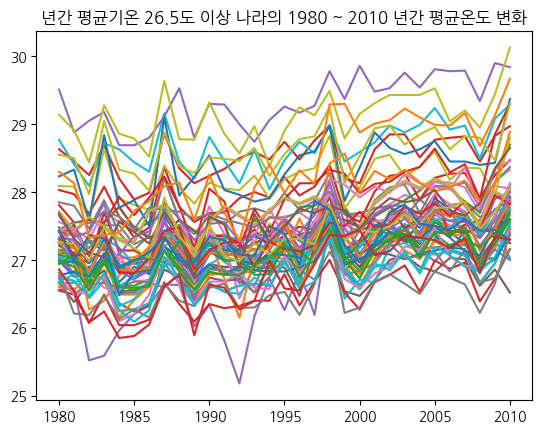

In [ ]:
for up in a:
    plt.plot(year_list,up_25_DF.loc[up])
plt.title('년간 평균기온 26.5도 이상 나라의 1980 ~ 2010 년간 평균온도 변화')
plt.show()

# up_25_DF